In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [11]:
df = pd.read_csv("Sample - Superstore.csv", encoding="ISO-8859-1")

In [13]:
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,6/12/2016,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [29]:
df['Order Date'] = pd.to_datetime(df['Order Date'])
df['Ship Date'] = pd.to_datetime(df['Ship Date'])
df['Shipping Time'] = (df['Ship Date'] - df['Order Date']).dt.days
df['Year'] = df['Order Date'].dt.year
df['Month'] = df['Order Date'].dt.month
df['Weekday'] = df['Order Date'].dt.day_name()

In [31]:
df.describe()
df['Segment'].value_counts()

Segment
Consumer       5191
Corporate      3020
Home Office    1783
Name: count, dtype: int64

In [57]:
total_sales = df['Sales'].sum()
print(f"Total Sales: ${total_sales:,.2f}")

Total Sales: $2,297,200.86


In [83]:
total_profit = df['Profit'].sum()
print(f"Total Profit: ${total_profit:,.2f}")

Total Profit: $286,397.02


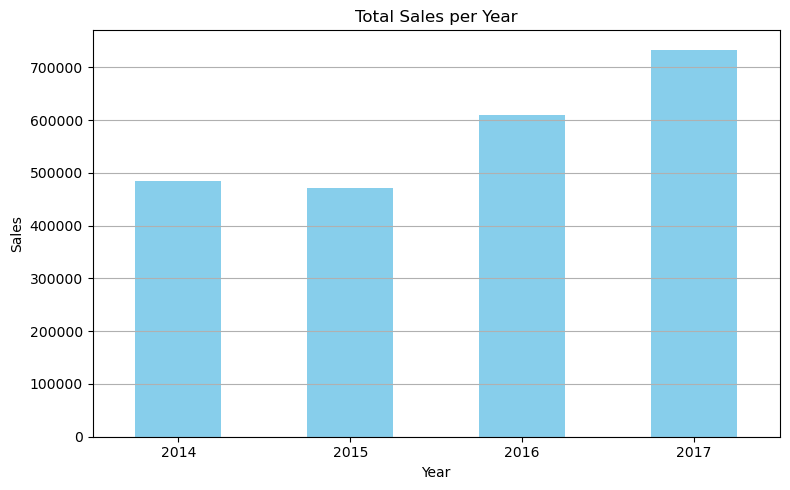

In [33]:
sales_by_year = df.groupby('Year')['Sales'].sum()

plt.figure(figsize=(8,5))
sales_by_year.plot(kind='bar', color='skyblue')
plt.title("Total Sales per Year")
plt.ylabel("Sales")
plt.xlabel("Year")
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

Year
2014    49543.9741
2015    61618.6037
2016    81795.1743
2017    93439.2696
Name: Profit, dtype: float64


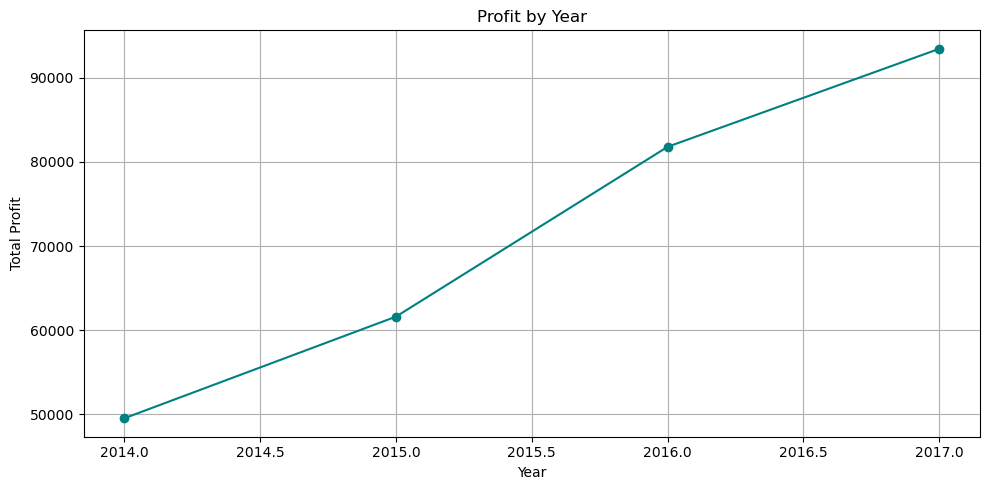

In [85]:
# Group by Year and sum Profit
profit_by_year = df.groupby('Year')['Profit'].sum()

# Display the result
print(profit_by_year)

# Plot
plt.figure(figsize=(10, 5))
profit_by_year.plot(kind='line', marker='o', linestyle='-', color='teal')
plt.title('Profit by Year')
plt.xlabel('Year')
plt.ylabel('Total Profit')
plt.grid(True)
plt.tight_layout()
plt.show()

Month
1      9134.4461
2     10294.6107
3     28594.6872
4     11587.4363
5     22411.3078
6     21285.7954
7     13832.6648
8     21776.9384
9     36857.4753
10    31784.0413
11    35468.4265
12    43369.1919
Name: Profit, dtype: float64


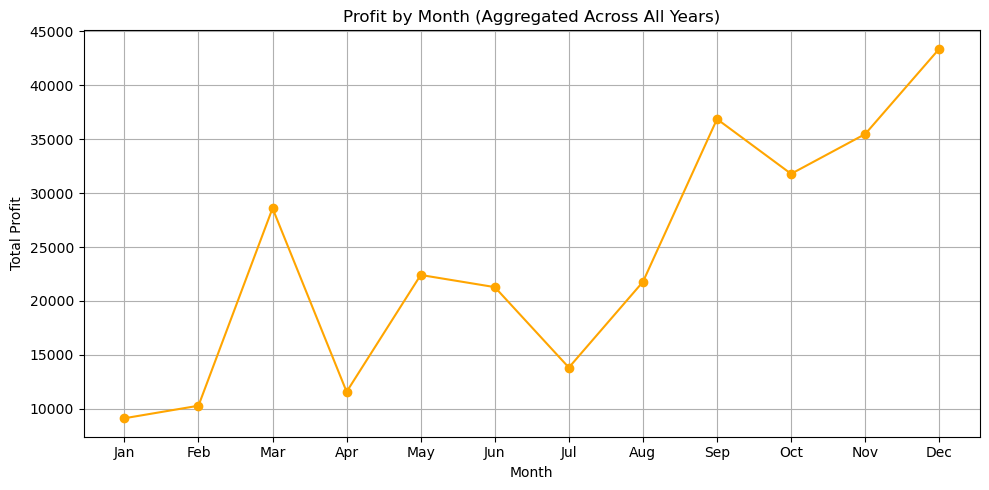

In [87]:
# Group by Month and sum Profit
profit_by_month = df.groupby('Month')['Profit'].sum()

# Display the result
print(profit_by_month)

# Plot
plt.figure(figsize=(10, 5))
profit_by_month.plot(kind='line', marker='o', linestyle='-', color='orange')
plt.title('Profit by Month (Aggregated Across All Years)')
plt.xlabel('Month')
plt.ylabel('Total Profit')
plt.xticks(ticks=range(1, 13), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 
                                       'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.grid(True)
plt.tight_layout()
plt.show()

In [35]:
# Group by Category and Sub-Category
category_profit = df.groupby(['Category', 'Sub-Category'])[['Sales', 'Profit']].sum().sort_values(by='Sales', ascending=False)

print(category_profit)


                                    Sales      Profit
Category        Sub-Category                         
Technology      Phones        330007.0540  44515.7306
Furniture       Chairs        328449.1030  26590.1663
Office Supplies Storage       223843.6080  21278.8264
Furniture       Tables        206965.5320 -17725.4811
Office Supplies Binders       203412.7330  30221.7633
Technology      Machines      189238.6310   3384.7569
                Accessories   167380.3180  41936.6357
                Copiers       149528.0300  55617.8249
Furniture       Bookcases     114879.9963  -3472.5560
Office Supplies Appliances    107532.1610  18138.0054
Furniture       Furnishings    91705.1640  13059.1436
Office Supplies Paper          78479.2060  34053.5693
                Supplies       46673.5380  -1189.0995
                Art            27118.7920   6527.7870
                Envelopes      16476.4020   6964.1767
                Labels         12486.3120   5546.2540
                Fasteners   

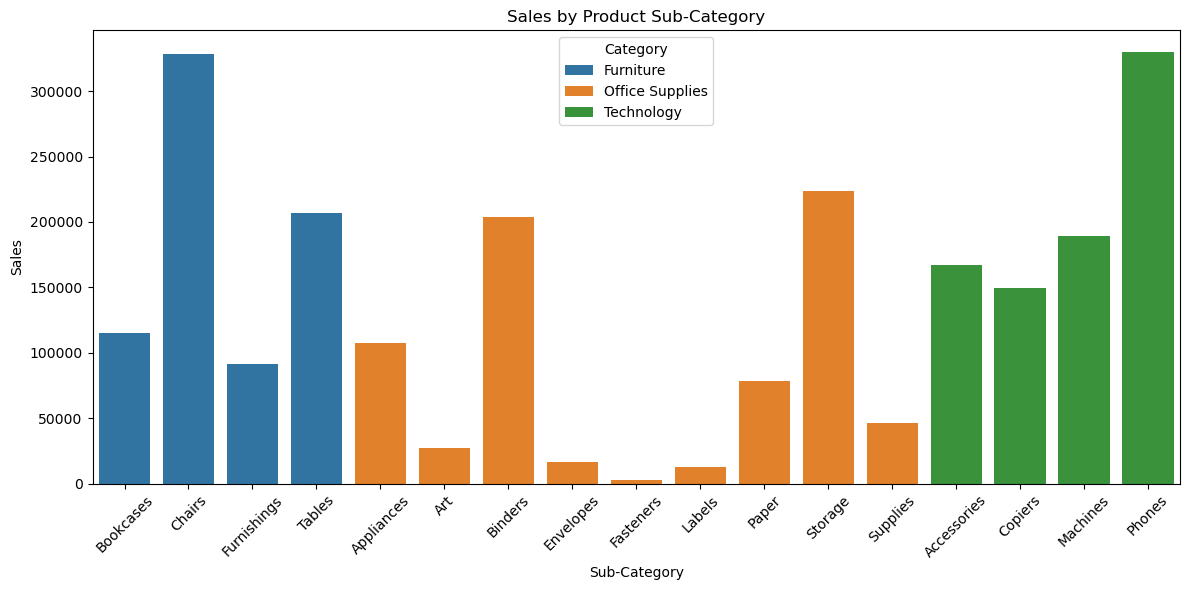

In [37]:
category_summary = df.groupby(['Category', 'Sub-Category'])[['Sales', 'Profit']].sum().reset_index()

plt.figure(figsize=(12,6))
sns.barplot(x='Sub-Category', y='Sales', hue='Category', data=category_summary)
plt.title("Sales by Product Sub-Category")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

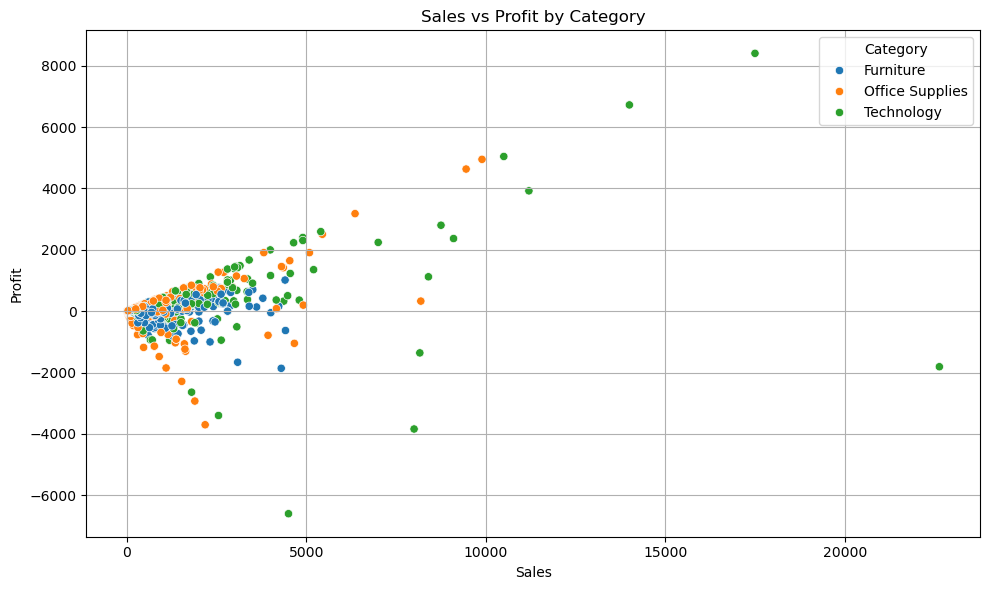

In [47]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=df, x='Sales', y='Profit', hue='Category')
plt.title('Sales vs Profit by Category')
plt.xlabel('Sales')
plt.ylabel('Profit')
plt.grid(True)
plt.tight_layout()
plt.show()

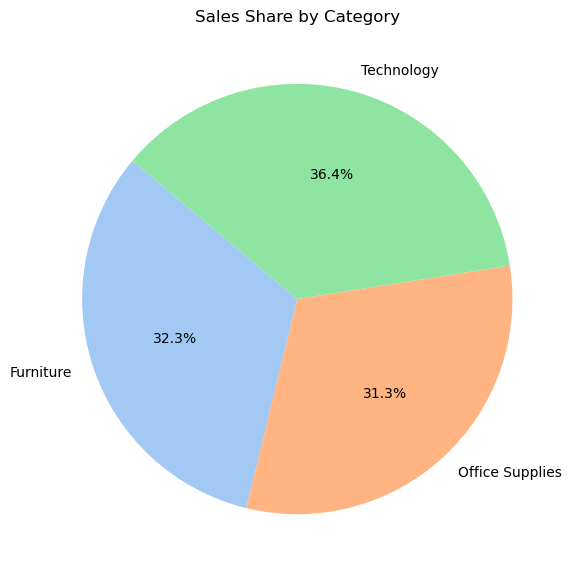

In [51]:
cat_sales = df.groupby('Category')['Sales'].sum()

plt.figure(figsize=(6,6))
cat_sales.plot(kind='pie', autopct='%1.1f%%', startangle=140, colors=sns.color_palette("pastel"))
plt.title('Sales Share by Category')
plt.ylabel('')
plt.tight_layout()
plt.show()


    Region     State         Category      Sales     Profit
0  Central  Illinois        Furniture  28274.522 -9076.2894
1  Central  Illinois  Office Supplies  19907.906 -8354.1568
2  Central  Illinois       Technology  31983.673  4822.5592
3  Central   Indiana        Furniture  11496.710  2181.2753
4  Central   Indiana  Office Supplies  15735.400  5200.7837


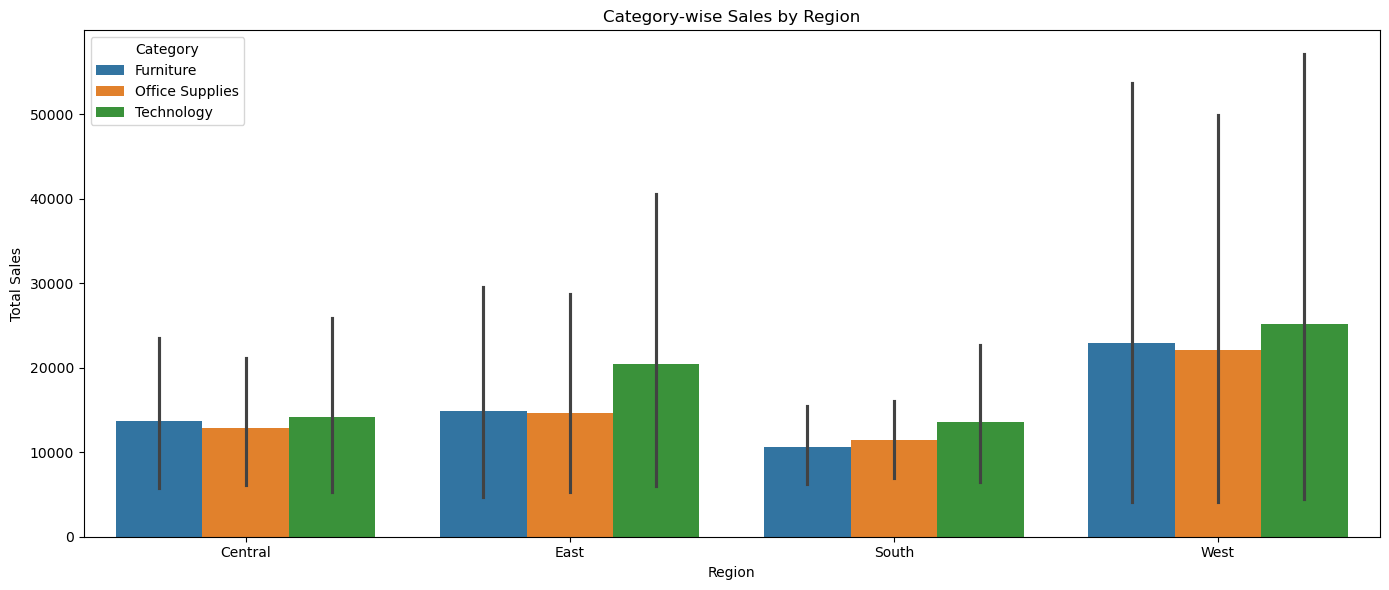

In [93]:
# Group by Region, State, and Category to get total Sales and Profit
category_grouped = df.groupby(['Region', 'State', 'Category'])[['Sales', 'Profit']].sum().reset_index()

# Pivot for a clearer view (optional)
pivot_data = category_grouped.pivot_table(index=['State', 'Category'], columns='Region', values='Sales', fill_value=0)

# Display part of the data
print(category_grouped.head())

# Plot: Category-wise Sales by Region
plt.figure(figsize=(14, 6))
sns.barplot(data=category_grouped, x='Region', y='Sales', hue='Category')
plt.title('Category-wise Sales by Region')
plt.ylabel('Total Sales')
plt.xlabel('Region')
plt.legend(title='Category')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

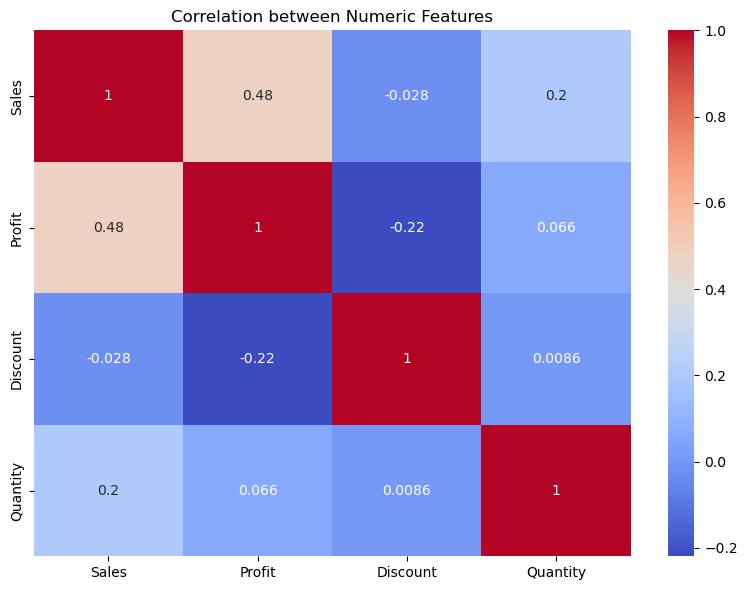

In [53]:
plt.figure(figsize=(8,6))
sns.heatmap(df[['Sales', 'Profit', 'Discount', 'Quantity']].corr(), annot=True, cmap='coolwarm')
plt.title("Correlation between Numeric Features")
plt.tight_layout()
plt.show()

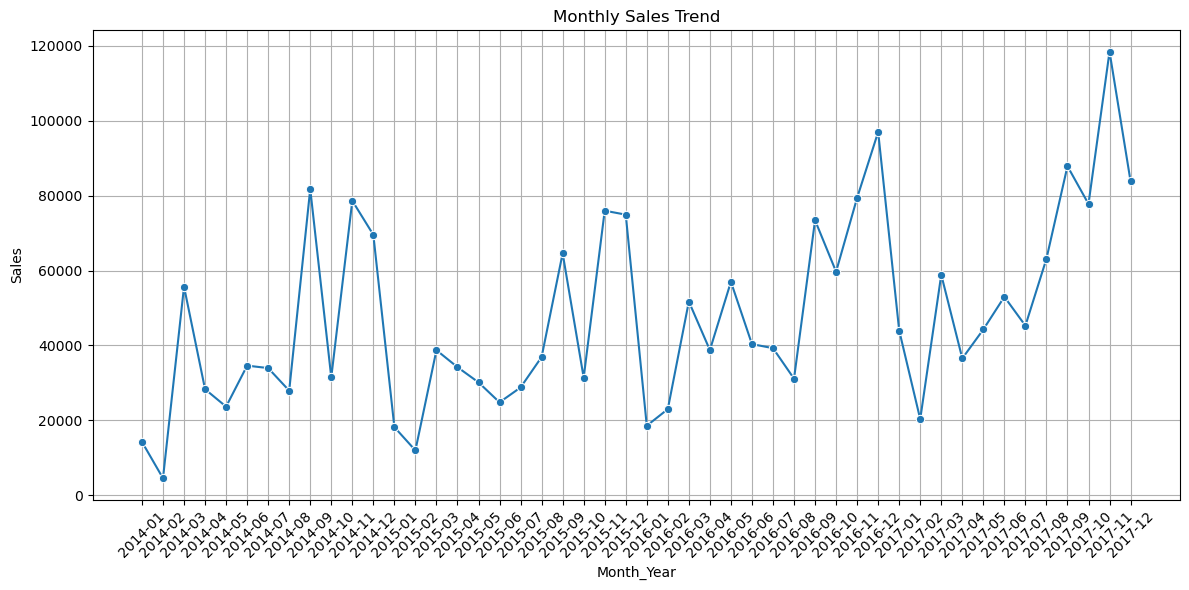

In [49]:
df['Month_Year'] = df['Order Date'].dt.to_period('M')
monthly_sales = df.groupby('Month_Year')['Sales'].sum().reset_index()
monthly_sales['Month_Year'] = monthly_sales['Month_Year'].astype(str)

plt.figure(figsize=(12,6))
sns.lineplot(data=monthly_sales, x='Month_Year', y='Sales', marker='o')
plt.title('Monthly Sales Trend')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()


Customer Name
Sean Miller           25043.050
Tamara Chand          19052.218
Raymond Buch          15117.339
Tom Ashbrook          14595.620
Adrian Barton         14473.571
Ken Lonsdale          14175.229
Sanjit Chand          14142.334
Hunter Lopez          12873.298
Sanjit Engle          12209.438
Christopher Conant    12129.072
Name: Sales, dtype: float64


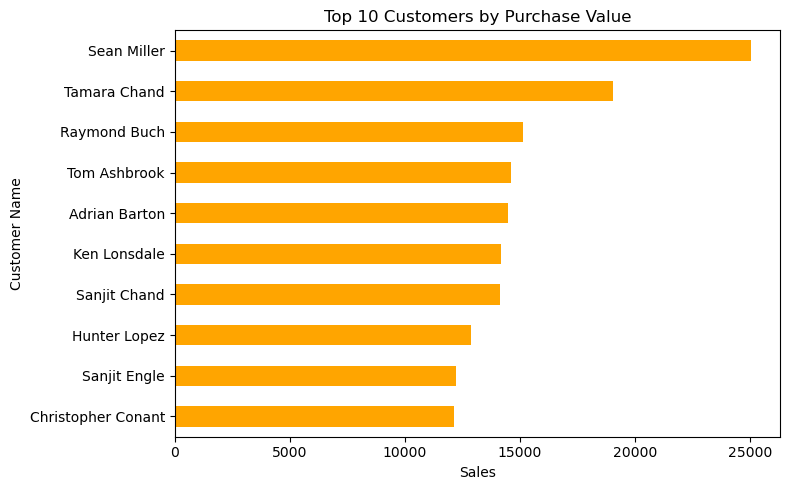

In [39]:
top_customers = df.groupby('Customer Name')['Sales'].sum().sort_values(ascending=False).head(10)
print(top_customers)

# Plot
top_customers.plot(kind='barh', figsize=(8,5), color='orange')
plt.title("Top 10 Customers by Purchase Value")
plt.xlabel("Sales")
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

C:\Users\Asus\AppData\Local\Temp\ipykernel_23032\1099864638.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_customers, x='Profit', y='Customer Name', palette='viridis')


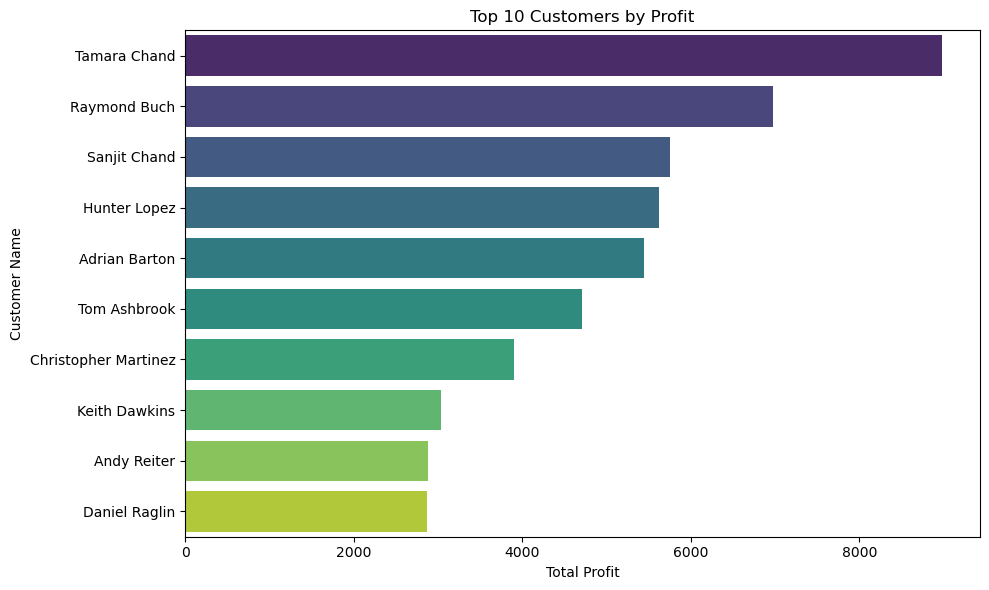

In [95]:
# Group by Customer Name and sum Profit
top_customers = df.groupby('Customer Name')['Profit'].sum().sort_values(ascending=False).head(10)

# Reset index for plotting
top_customers = top_customers.reset_index()

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(data=top_customers, x='Profit', y='Customer Name', palette='viridis')
plt.title('Top 10 Customers by Profit')
plt.xlabel('Total Profit')
plt.ylabel('Customer Name')
plt.tight_layout()
plt.show()

Product Name
Canon imageCLASS 2200 Advanced Copier                                          61599.824
Fellowes PB500 Electric Punch Plastic Comb Binding Machine with Manual Bind    27453.384
Cisco TelePresence System EX90 Videoconferencing Unit                          22638.480
HON 5400 Series Task Chairs for Big and Tall                                   21870.576
GBC DocuBind TL300 Electric Binding System                                     19823.479
GBC Ibimaster 500 Manual ProClick Binding System                               19024.500
Hewlett Packard LaserJet 3310 Copier                                           18839.686
HP Designjet T520 Inkjet Large Format Printer - 24" Color                      18374.895
GBC DocuBind P400 Electric Binding System                                      17965.068
High Speed Automatic Electric Letter Opener                                    17030.312
Name: Sales, dtype: float64


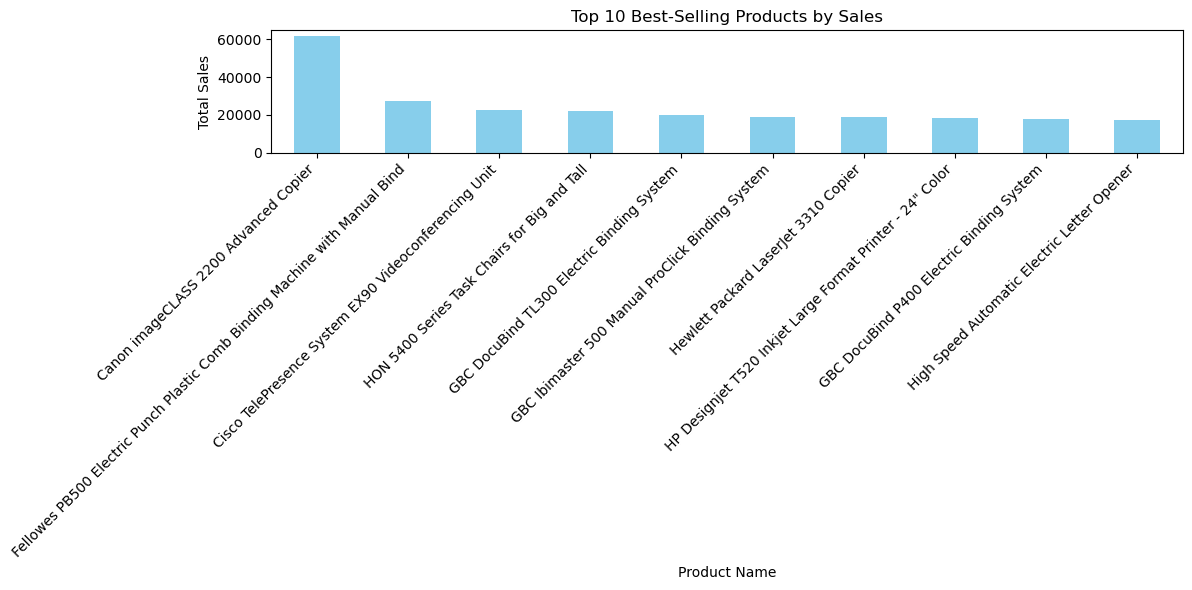

In [79]:
# Group by Product Name and sum Sales
top_products_sales = df.groupby('Product Name')['Sales'].sum().sort_values(ascending=False).head(10)

# Display the top 10 products by sales
print(top_products_sales)

# Plot
plt.figure(figsize=(12, 6))
top_products_sales.plot(kind='bar', color='skyblue')
plt.title('Top 10 Best-Selling Products by Sales')
plt.xlabel('Product Name')
plt.ylabel('Total Sales')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

Product Name
Canon imageCLASS 2200 Advanced Copier                                          25199.9280
Fellowes PB500 Electric Punch Plastic Comb Binding Machine with Manual Bind     7753.0390
Hewlett Packard LaserJet 3310 Copier                                            6983.8836
Canon PC1060 Personal Laser Copier                                              4570.9347
HP Designjet T520 Inkjet Large Format Printer - 24" Color                       4094.9766
Ativa V4110MDD Micro-Cut Shredder                                               3772.9461
3D Systems Cube Printer, 2nd Generation, Magenta                                3717.9714
Plantronics Savi W720 Multi-Device Wireless Headset System                      3696.2820
Ibico EPK-21 Electric Binding System                                            3345.2823
Zebra ZM400 Thermal Label Printer                                               3343.5360
Name: Profit, dtype: float64


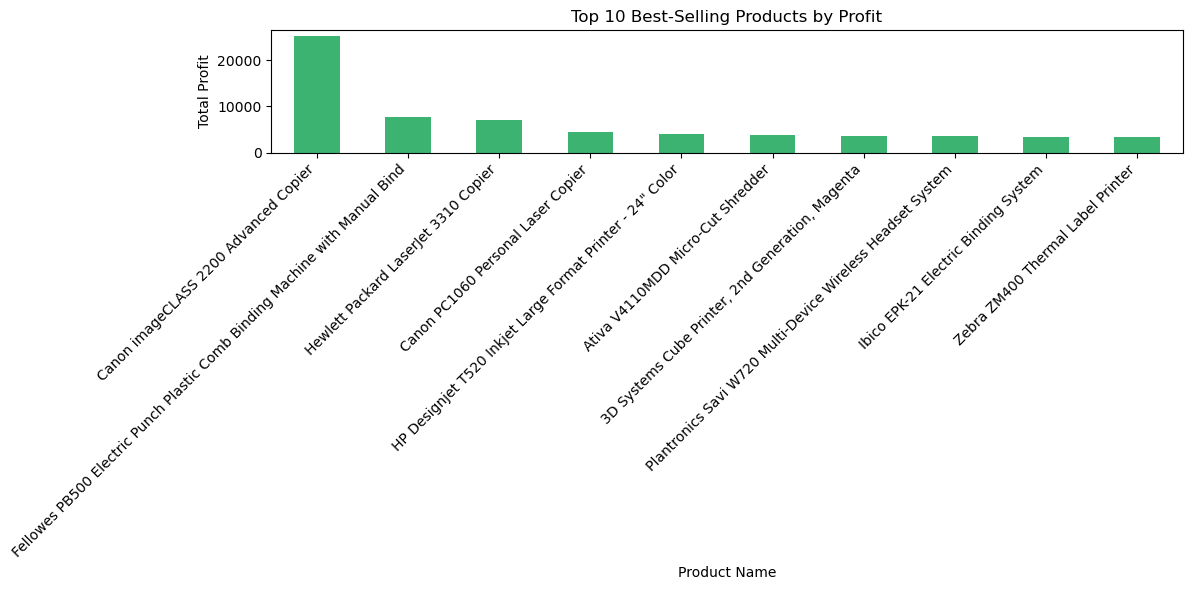

In [81]:
# Group by Product Name and sum Profit
top_products_profit = df.groupby('Product Name')['Profit'].sum().sort_values(ascending=False).head(10)

# Display the top 10 products by profit
print(top_products_profit)

# Plot
plt.figure(figsize=(12, 6))
top_products_profit.plot(kind='bar', color='mediumseagreen')
plt.title('Top 10 Best-Selling Products by Profit')
plt.xlabel('Product Name')
plt.ylabel('Total Profit')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

               Sales       Profit
Region                           
West     725457.8245  108418.4489
East     678781.2400   91522.7800
South    391721.9050   46749.4303
Central  501239.8908   39706.3625


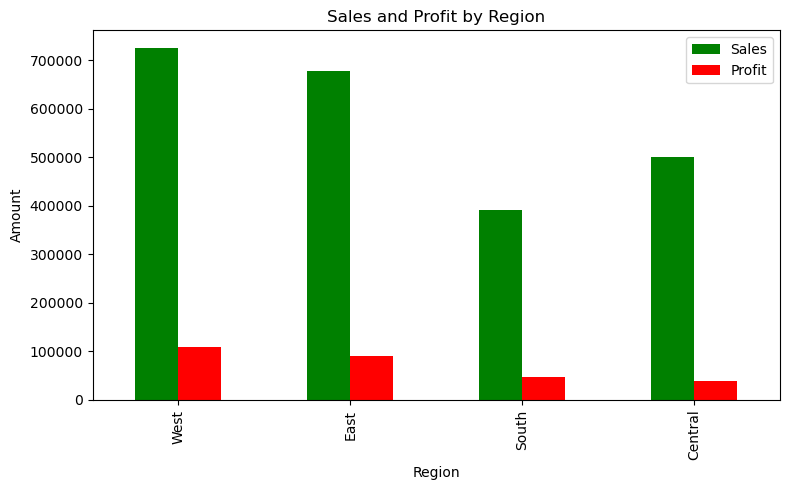

In [41]:
region_perf = df.groupby('Region')[['Sales', 'Profit']].sum().sort_values(by='Profit', ascending=False)
print(region_perf)

# Plot
region_perf.plot(kind='bar', figsize=(8,5), color=['green', 'red'])
plt.title("Sales and Profit by Region")
plt.ylabel("Amount")
plt.tight_layout()
plt.show()


In [61]:
# Group by State and sum Sales
sales_by_state = df.groupby('State')['Sales'].sum().sort_values(ascending=False)

# Display the top states by sales
print(sales_by_state)

State
California              457687.6315
New York                310876.2710
Texas                   170188.0458
Washington              138641.2700
Pennsylvania            116511.9140
Florida                  89473.7080
Illinois                 80166.1010
Ohio                     78258.1360
Michigan                 76269.6140
Virginia                 70636.7200
North Carolina           55603.1640
Indiana                  53555.3600
Georgia                  49095.8400
Kentucky                 36591.7500
New Jersey               35764.3120
Arizona                  35282.0010
Wisconsin                32114.6100
Colorado                 32108.1180
Tennessee                30661.8730
Minnesota                29863.1500
Massachusetts            28634.4340
Delaware                 27451.0690
Maryland                 23705.5230
Rhode Island             22627.9560
Missouri                 22205.1500
Oklahoma                 19683.3900
Alabama                  19510.6400
Oregon                

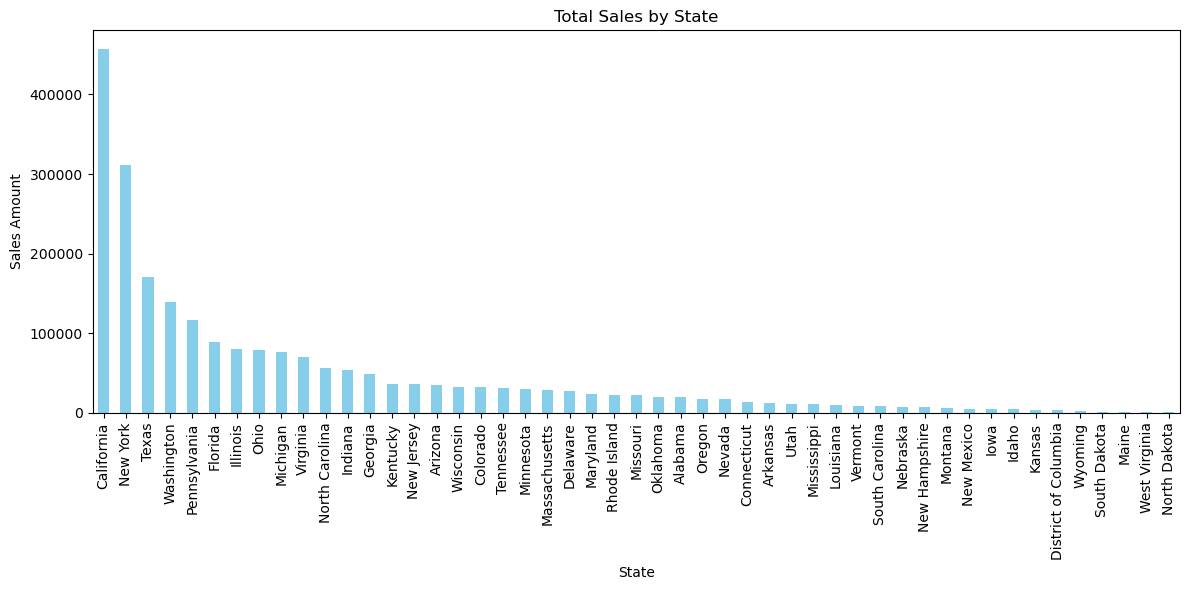

In [63]:
# Plot
plt.figure(figsize=(12, 6))
sales_by_state.plot(kind='bar', color='skyblue')
plt.title('Total Sales by State')
plt.ylabel('Sales Amount')
plt.xlabel('State')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

In [65]:
# Group by State and sum Profit
profit_by_state = df.groupby('State')['Profit'].sum().sort_values(ascending=False)

# Display the profits
print(profit_by_state)

State
California              76381.3871
New York                74038.5486
Washington              33402.6517
Michigan                24463.1876
Virginia                18597.9504
Indiana                 18382.9363
Georgia                 16250.0433
Kentucky                11199.6966
Minnesota               10823.1874
Delaware                 9977.3748
New Jersey               9772.9138
Wisconsin                8401.8004
Rhode Island             7285.6293
Maryland                 7031.1788
Massachusetts            6785.5016
Missouri                 6436.2105
Alabama                  5786.8253
Oklahoma                 4853.9560
Arkansas                 4008.6871
Connecticut              3511.4918
Nevada                   3316.7659
Mississippi              3172.9762
Utah                     2546.5335
Vermont                  2244.9783
Louisiana                2196.1023
Nebraska                 2037.0942
Montana                  1833.3285
South Carolina           1769.0566
New Hampshire 

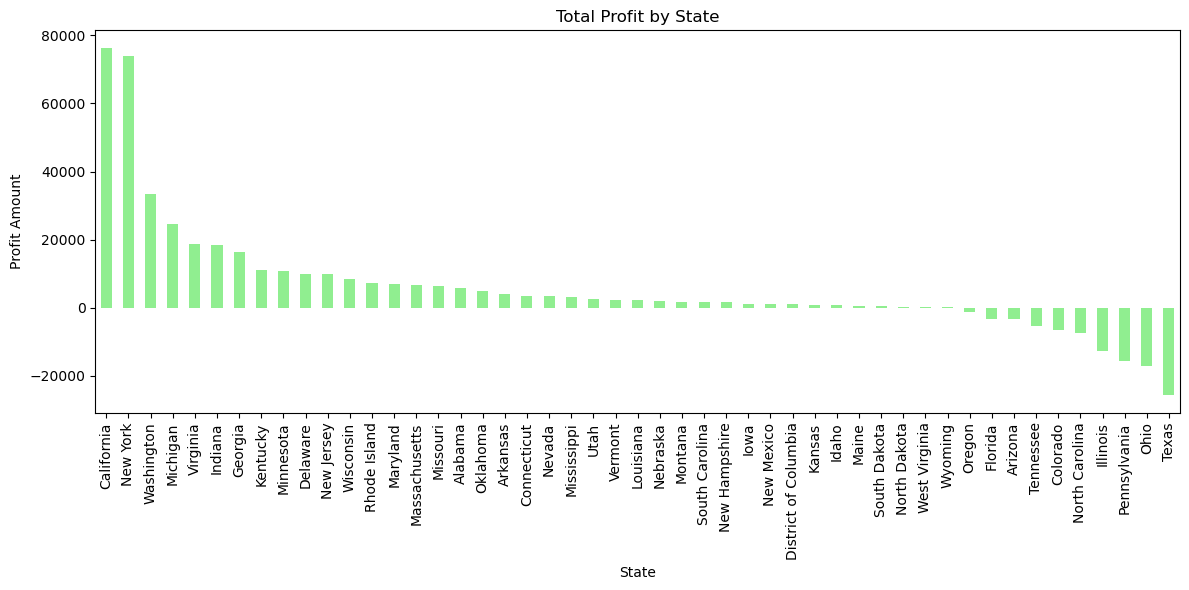

In [67]:
# Plot
plt.figure(figsize=(12, 6))
profit_by_state.plot(kind='bar', color='lightgreen')
plt.title('Total Profit by State')
plt.ylabel('Profit Amount')
plt.xlabel('State')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

In [43]:
# Convert Ship Date
df['Ship Date'] = pd.to_datetime(df['Ship Date'])

# Calculate shipping delay
df['Shipping Delay'] = (df['Ship Date'] - df['Order Date']).dt.days

# Average delay by shipping mode
shipping_efficiency = df.groupby('Ship Mode')['Shipping Delay'].mean().sort_values()
print(shipping_efficiency)


Ship Mode
Same Day          0.044199
First Class       2.182705
Second Class      3.238046
Standard Class    5.006535
Name: Shipping Delay, dtype: float64


C:\Users\Asus\AppData\Local\Temp\ipykernel_23032\1041037632.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Shipping Delay', y='Ship Mode', data=shipping_delay, palette='coolwarm')


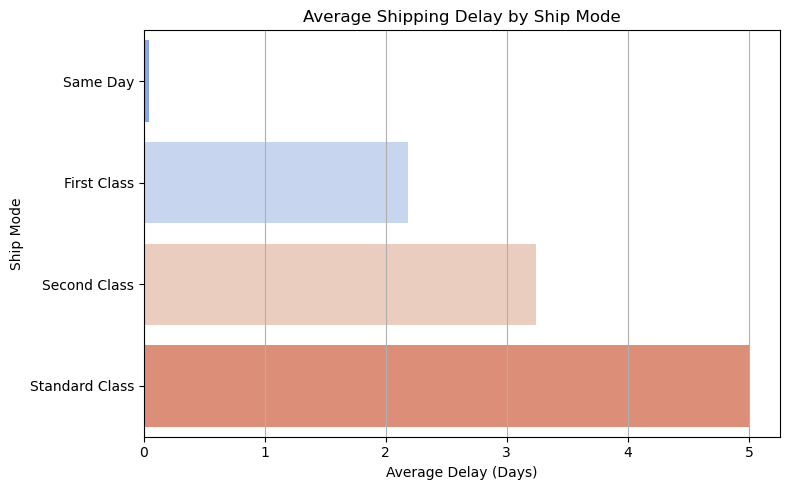

In [45]:
# Group by Ship Mode
shipping_delay = df.groupby('Ship Mode')['Shipping Delay'].mean().reset_index().sort_values(by='Shipping Delay')

# Plot
plt.figure(figsize=(8,5))
sns.barplot(x='Shipping Delay', y='Ship Mode', data=shipping_delay, palette='coolwarm')
plt.title("Average Shipping Delay by Ship Mode")
plt.xlabel("Average Delay (Days)")
plt.ylabel("Ship Mode")
plt.tight_layout()
plt.grid(axis='x')
plt.show()

In [69]:
# Group by Region and Ship Mode
ship_mode_region = df.groupby(['Region', 'Ship Mode']).size().unstack()

# Display the grouped data
print(ship_mode_region)

Ship Mode  First Class  Same Day  Second Class  Standard Class
Region                                                        
Central            299       120           465            1439
East               490       155           530            1673
South              234        83           329             974
West               515       185           621            1882


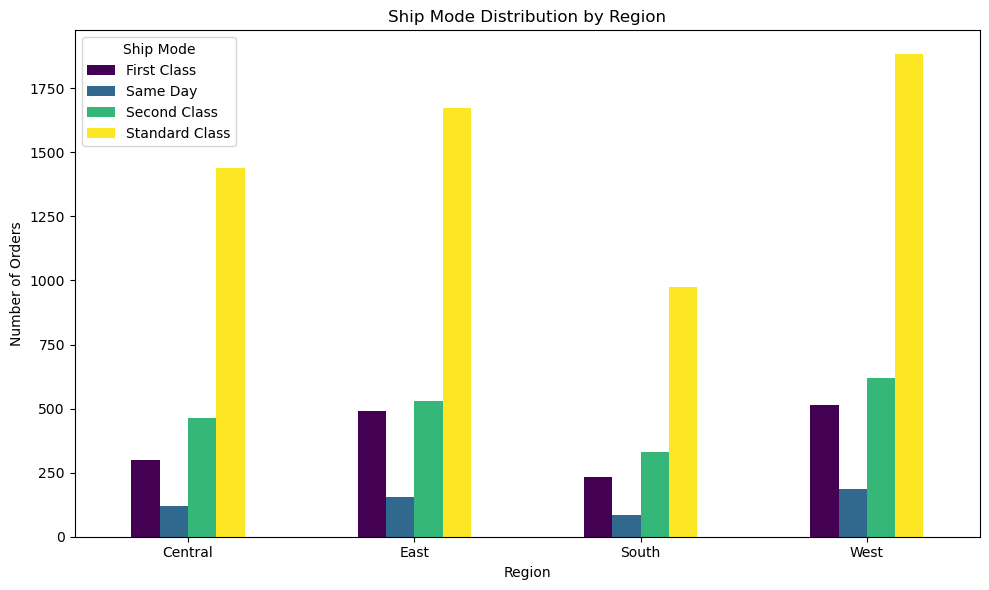

In [71]:
# Plot
ship_mode_region.plot(kind='bar', figsize=(10, 6), colormap='viridis')
plt.title('Ship Mode Distribution by Region')
plt.xlabel('Region')
plt.ylabel('Number of Orders')
plt.xticks(rotation=0)
plt.legend(title='Ship Mode')
plt.tight_layout()
plt.show()

In [73]:
# Group by State and Ship Mode
ship_mode_state = df.groupby(['State', 'Ship Mode']).size().unstack(fill_value=0)

# Display the table
print(ship_mode_state)

Ship Mode             First Class  Same Day  Second Class  Standard Class
State                                                                    
Alabama                         9         1            18              33
Arizona                        42        16            27             139
Arkansas                       10         2            10              38
California                    322       119           395            1165
Colorado                       44         6            33              99
Connecticut                    19        10            11              42
Delaware                       18         2            16              60
District of Columbia            0         0             3               7
Florida                        54        28            67             234
Georgia                        22        15            31             116
Idaho                           4         0             4              13
Illinois                       67     

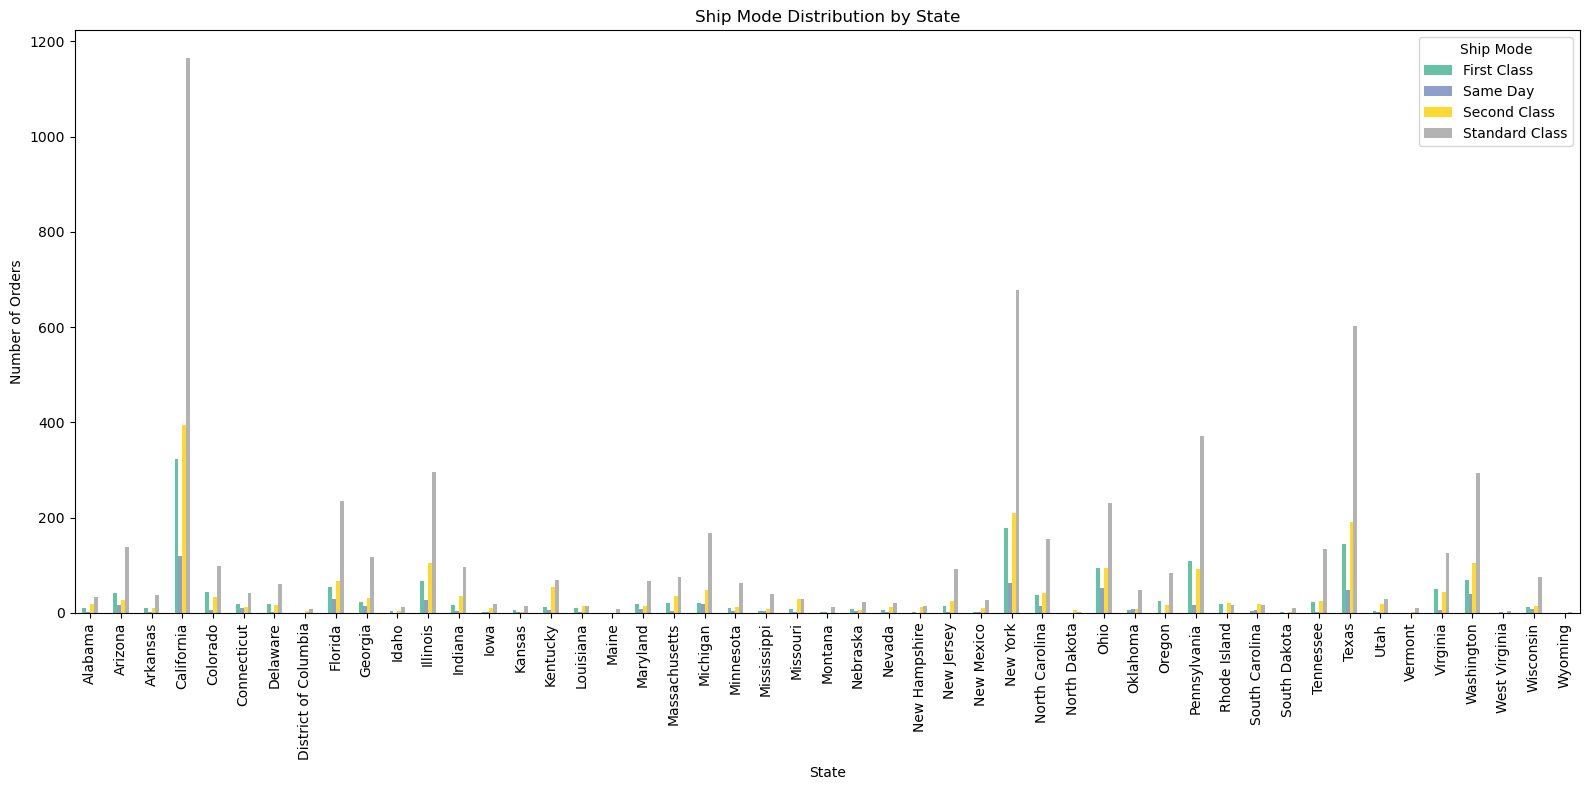

In [75]:
# Plot
ship_mode_state.plot(kind='bar', stacked=False, figsize=(16, 8), colormap='Set2')
plt.title('Ship Mode Distribution by State')
plt.xlabel('State')
plt.ylabel('Number of Orders')
plt.xticks(rotation=90)
plt.legend(title='Ship Mode')
plt.tight_layout()
plt.show()